# **Heart Disease Prediction**

---
Logistic Regression Project Exercise - Solutions
GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)

Data
This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

**Content**

Attribute Information:

age
sex
chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target:0 for no presence of heart disease, 1 for presence of heart disease
Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Creators:**

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.




## 1. Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Importing the dataset

In [5]:
dataset = pd.read_csv('heart.csv', index_col=None)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 4. Fit logstic Regression on the Training set

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### 5. Making the Confusion Matrix (Performance metric)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix , classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22  5]
 [ 4 30]]


0.8524590163934426

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


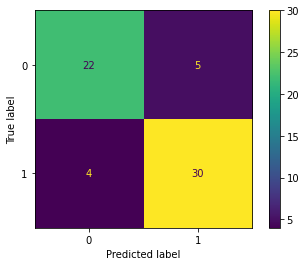

In [10]:
plot_confusion_matrix(classifier, X_test, y_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## 6. Plot ROC curve and caculate AUC score (Performance metric)

In [12]:
y_pred_p = classifier.predict_proba(X_test)    ## Predict the probability of being a fraud
print(y_pred_p)
print(y_pred)

[[0.95222636 0.04777364]
 [0.20450787 0.79549213]
 [0.19021678 0.80978322]
 [0.9778702  0.0221298 ]
 [0.9083853  0.0916147 ]
 [0.56246712 0.43753288]
 [0.95734616 0.04265384]
 [0.88440155 0.11559845]
 [0.99526784 0.00473216]
 [0.99628903 0.00371097]
 [0.22805893 0.77194107]
 [0.06685201 0.93314799]
 [0.96885573 0.03114427]
 [0.13407206 0.86592794]
 [0.04522786 0.95477214]
 [0.31957829 0.68042171]
 [0.93840306 0.06159694]
 [0.25549892 0.74450108]
 [0.99402117 0.00597883]
 [0.14762664 0.85237336]
 [0.1533984  0.8466016 ]
 [0.73376861 0.26623139]
 [0.93980918 0.06019082]
 [0.90183418 0.09816582]
 [0.14103796 0.85896204]
 [0.61765541 0.38234459]
 [0.8147481  0.1852519 ]
 [0.6939118  0.3060882 ]
 [0.03008535 0.96991465]
 [0.33311245 0.66688755]
 [0.36098167 0.63901833]
 [0.9862954  0.0137046 ]
 [0.04103593 0.95896407]
 [0.24638159 0.75361841]
 [0.07921296 0.92078704]
 [0.30283484 0.69716516]
 [0.96452923 0.03547077]
 [0.15371114 0.84628886]
 [0.90424348 0.09575652]
 [0.85296992 0.14703008]


In [13]:
def column(matrix, i):
    return [row[i] for row in matrix]

y_pred_p1=column(y_pred_p , 1)  ## keep the second column of probability being a fraud (1)

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_p1)
print('AUC: %.4f' % auc) 
fpr, tpr, _ = roc_curve(y_test, y_pred_p1)

ns_probs = [0 for _ in range(len(y_pred_p1))]
ns_auc = roc_auc_score(y_test , ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test , ns_probs)

AUC: 0.9085


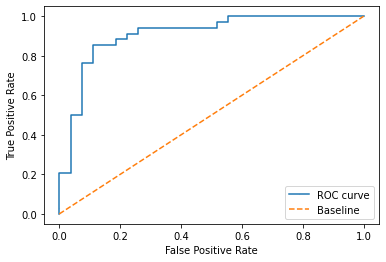

In [15]:
# plot the roc curve for the model
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='ROC curve', markersize=.1)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', markersize=.1)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

fig1 = pyplot.gcf()
# show the plot
pyplot.show()
fig1.savefig('ROC.png', dpi=300)